In [39]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ANALISIS EXPLORATORIO

In [12]:
df = pl.read_csv("data/train.csv", has_header=True)
df.head()

id,bone_length,rotting_flesh,hair_length,has_soul,color,type
i64,f64,f64,f64,f64,str,str
0,0.354512,0.350839,0.465761,0.781142,"""clear""","""Ghoul"""
1,0.57556,0.425868,0.531401,0.439899,"""green""","""Goblin"""
2,0.467875,0.35433,0.811616,0.791225,"""black""","""Ghoul"""
4,0.776652,0.508723,0.636766,0.884464,"""black""","""Ghoul"""
5,0.566117,0.875862,0.418594,0.636438,"""green""","""Ghost"""


In [11]:
df.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [36]:
df_numerical = df.with_columns(
    pl.when(pl.col("color") == "white").then(0)
    .when(pl.col("color") == "black").then(1)
    .when(pl.col("color") == "clear").then(2)
    .when(pl.col("color") == "blue").then(3)
    .when(pl.col("color") == "green").then(4)
    .when(pl.col("color") == "blood").then(5).alias("color"),

    pl.when(pl.col("type") == "Ghoul").then(0)
    .when(pl.col("type") == "Goblin").then(1)
    .otherwise(2).alias("type"),
)

In [37]:
df_numerical.head()

id,bone_length,rotting_flesh,hair_length,has_soul,color,type
i64,f64,f64,f64,f64,i32,i32
0,0.354512,0.350839,0.465761,0.781142,2,0
1,0.57556,0.425868,0.531401,0.439899,4,1
2,0.467875,0.35433,0.811616,0.791225,1,0
4,0.776652,0.508723,0.636766,0.884464,1,0
5,0.566117,0.875862,0.418594,0.636438,4,2


## VISUALIZAR DATOS

### POR CAT

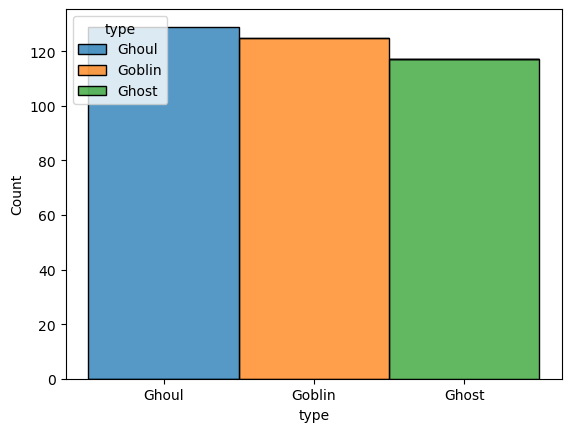

In [45]:
sns.histplot(df.to_pandas(), x="type", hue="type", multiple="stack", bins=6);

## NORMALIDAD

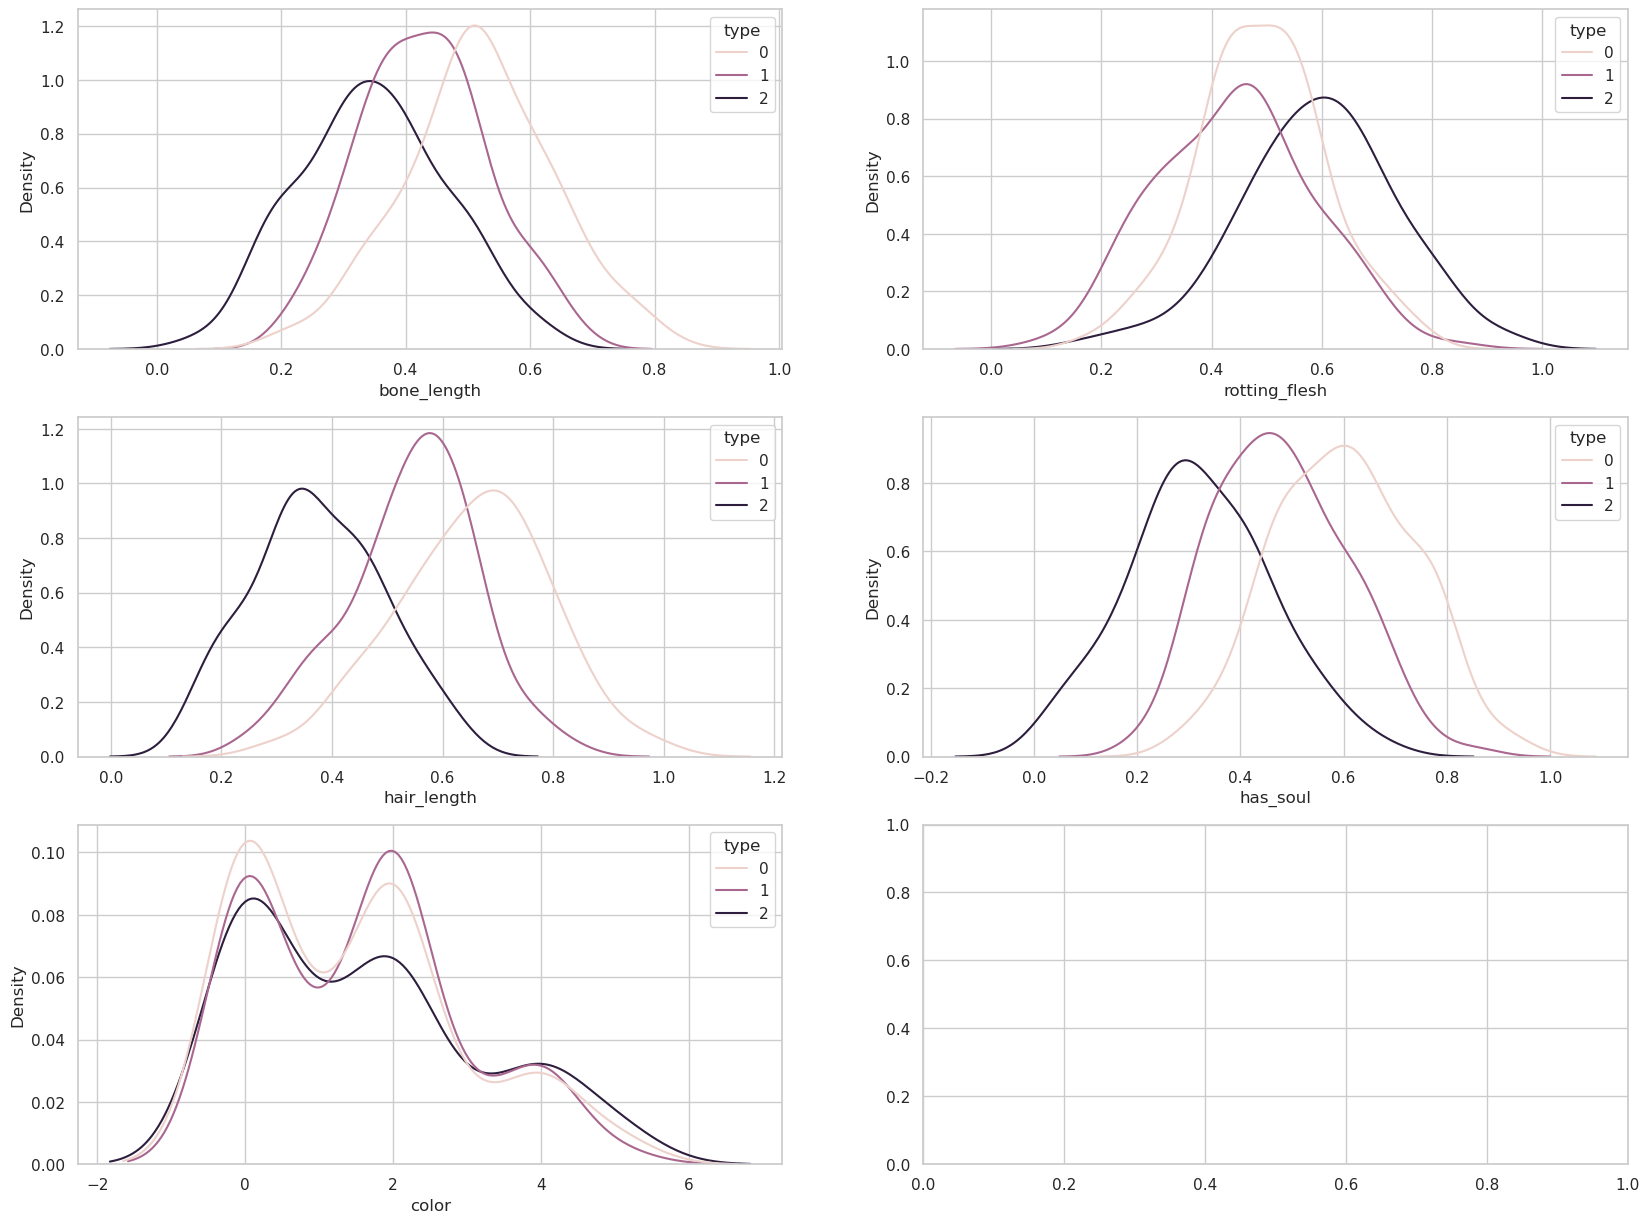

In [72]:
# graph  dist
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
sns.set(style="whitegrid", palette="muted")
sns.kdeplot(data=df_numerical.to_pandas(), x="bone_length", hue="type", ax=ax[0, 0])
sns.kdeplot(data=df_numerical.to_pandas(), x="rotting_flesh", hue="type", ax=ax[0, 1])
sns.kdeplot(data=df_numerical.to_pandas(), x="hair_length", hue="type", ax=ax[1, 0])
sns.kdeplot(data=df_numerical.to_pandas(), x="has_soul", hue="type", ax=ax[1, 1])
sns.kdeplot(data=df_numerical.to_pandas(), x="color", hue="type", ax=ax[2, 0]);

In [74]:
df_numerical.to_pandas().skew()

id              -0.042908
bone_length      0.055304
rotting_flesh    0.054411
hair_length     -0.015461
has_soul        -0.034449
color            0.615546
type             0.059515
dtype: float64

In [75]:
df_numerical.to_pandas().kurtosis()

id              -1.250154
bone_length     -0.182848
rotting_flesh   -0.074604
hair_length     -0.455075
has_soul        -0.325593
color           -0.580788
type            -1.491049
dtype: float64

## CORR

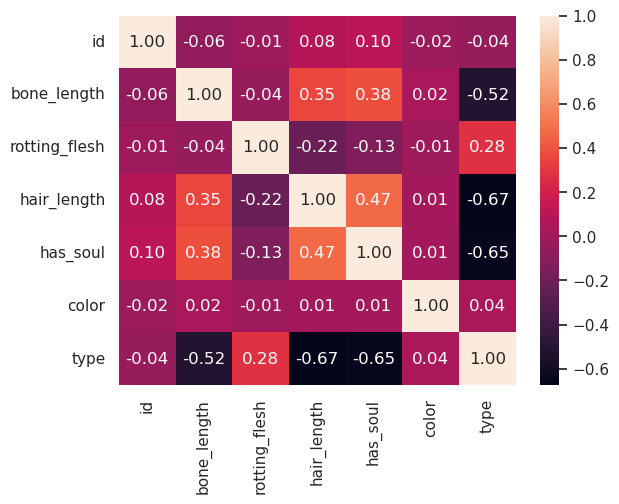

In [76]:
sns.heatmap(df_numerical.to_pandas().corr(), annot=True, fmt=".2f");

In [78]:
# seleccionamos los mejores atributos
df_numerical = df_numerical.select([
    "bone_length",
    "rotting_flesh",
    "hair_length",
    "has_soul",
    "type",
])

df_numerical.head()

bone_length,rotting_flesh,hair_length,has_soul,type
f64,f64,f64,f64,i32
0.354512,0.350839,0.465761,0.781142,0
0.57556,0.425868,0.531401,0.439899,1
0.467875,0.35433,0.811616,0.791225,0
0.776652,0.508723,0.636766,0.884464,0
0.566117,0.875862,0.418594,0.636438,2


# ENTRENAMIENTO

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
X = df_numerical.drop("type").to_numpy()
y = df_numerical["type"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296, 4) (75, 4) (296,) (75,)


- `LogisticRegression()`: Modelo de regresión logística, utilizado para clasificación binaria. Calcula la probabilidad de que una muestra pertenezca a una clase específica usando la función sigmoide:
  $
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $

- `SVC()`: Support Vector Classifier, un clasificador basado en máquinas de vectores de soporte que encuentra el hiperplano que mejor separa las clases en el espacio de características.

- `RandomForestClassifier()`: Clasificador de bosques aleatorios, que construye múltiples árboles de decisión y combina sus resultados para mejorar la precisión y controlar el sobreajuste.

- `GradientBoostingClassifier()`: Clasificador de boosting de gradiente, que construye modelos secuenciales, donde cada modelo corrige los errores del anterior, mejorando iterativamente la precisión.

- `KNeighborsClassifier()`: Clasificador de k-vecinos más cercanos, que asigna una clase a una muestra basándose en las clases de sus k vecinos más cercanos en el espacio de características.

- `GaussianNB()`: Clasificador Naive Bayes Gaussiano, que asume que las características siguen una distribución normal y utiliza el teorema de Bayes para la clasificación:
  $
  P(C_k | x) = \frac{P(x | C_k) P(C_k)}{P(x)}
  $

- `DecisionTreeClassifier()`: Clasificador de árbol de decisión, que divide el espacio de características en regiones homogéneas utilizando reglas de decisión basadas en las características de las muestras.

- `MLPClassifier()`: Clasificador de perceptrón multicapa, una red neuronal artificial que consiste en múltiples capas de neuronas y utiliza el aprendizaje supervisado para la clasificación.

In [86]:
# lets see the best modelll
models = [
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    MLPClassifier(),
]

model_results = []


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results.append((model, accuracy))
    

/home/tom/miniconda3/envs/ds-venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [91]:
for model, accuracy in model_results:
    print(f"{model.__class__.__name__}: {accuracy:.2f}")
print("ganador:", max(model_results, key=lambda x: x[1]))

LogisticRegression: 0.71
SVC: 0.67
RandomForestClassifier: 0.69
GradientBoostingClassifier: 0.65
KNeighborsClassifier: 0.65
GaussianNB: 0.69
DecisionTreeClassifier: 0.64
MLPClassifier: 0.73
ganador: (MLPClassifier(), 0.7333333333333333)


/tmp/ipykernel_63948/2081103067.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


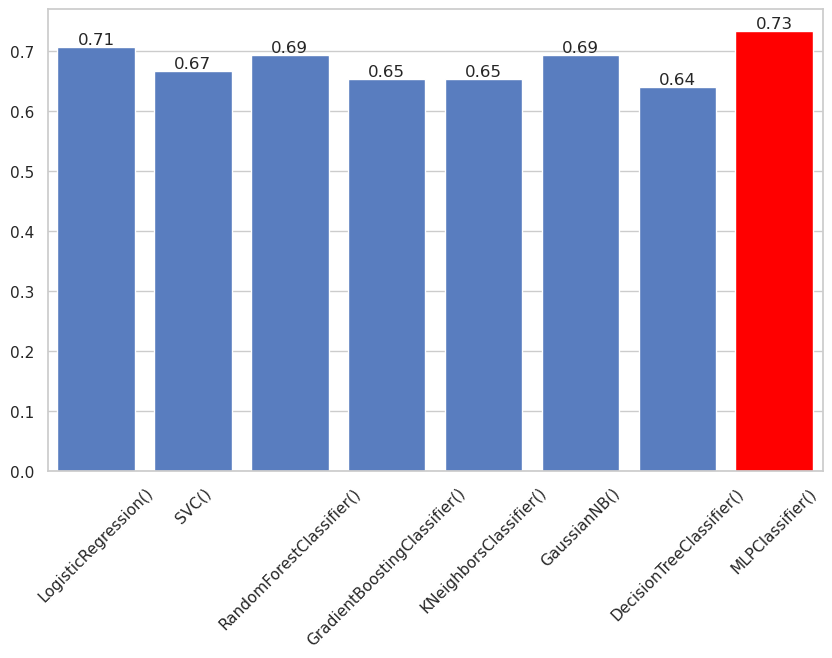

In [111]:
result_dict = dict(model_results)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(result_dict.keys()), y=list(result_dict.values()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for i, v in enumerate(result_dict.values()):
    ax.annotate(str(round(v, 2)), xy=(i, v), ha='center', va='bottom')

ax.patches[model_results.index(max(model_results, key=lambda x: x[1]))].set_facecolor('red')
plt.show()

EL mejor modelo resulto ser el `MLP`. Al ser un modelo más elaborado y robusto, es razonable que llegue a mejores resultados.

In [93]:
#report 
best_model = max(model_results, key=lambda x: x[1])[0]  
model_report = classification_report(y_test, best_model.predict(X_test))
print(model_report)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.58      0.64      0.61        22
           2       0.75      0.75      0.75        24

    accuracy                           0.73        75
   macro avg       0.73      0.73      0.73        75
weighted avg       0.74      0.73      0.74        75



# EVALUAR MODELO

In [113]:
df_test = pl.read_csv("data/test.csv", has_header=True)
df_test = df_test.drop("id").drop("color")

df_test.head()

bone_length,rotting_flesh,hair_length,has_soul
f64,f64,f64,f64
0.471774,0.387937,0.706087,0.698537
0.427332,0.645024,0.565558,0.451462
0.549602,0.491931,0.660387,0.449809
0.638095,0.682867,0.471409,0.356924
0.361762,0.583997,0.377256,0.276364


In [173]:
predictions = best_model.predict(df_test.to_numpy())

In [174]:
import pandas as pd
df_predictions = pd.DataFrame(predictions, columns=["type"])

monster_mapping = {0: 'Ghoul', 1: 'Goblin', 2: 'Ghost'}
df_predictions['type'] = df_predictions['type'].map(monster_mapping)
df_predictions


,type
0,Ghoul
1,Goblin
2,Ghoul
3,Ghost
4,Ghost
...,...
524,Goblin
525,Ghost
526,Ghoul
527,Ghost


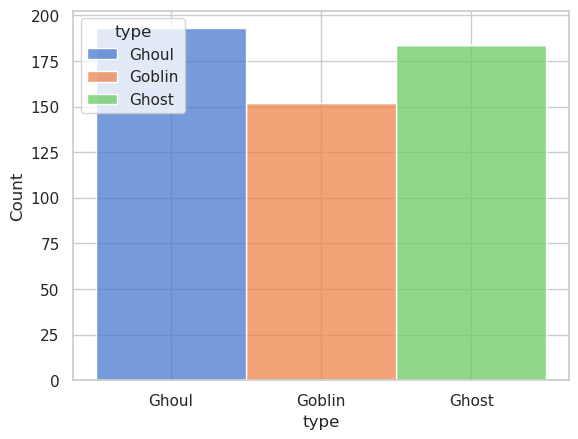

In [176]:
sns.histplot(df_predictions, x="type", hue="type", multiple="stack", bins=6);